<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(2_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.031173,96.710196,24.370348,136.142786,320.254503,168.107883,152.146619
1,0.0,1.0,79.735103,69.939304,59.302123,116.335192,335.311723,211.001273,124.310450
2,0.0,2.0,39.896229,24.890286,40.286500,-19.250094,95.822921,128.004529,-32.181608
3,0.0,3.0,47.586037,78.338204,94.943687,30.277694,261.145622,211.292985,49.852637
4,0.0,4.0,63.514174,32.073093,46.765570,-7.611134,144.741704,162.465831,-17.724128
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,36.719930,67.191946,95.467874,204.731896,414.111646,210.116014,203.995632
19996,999.0,16.0,67.309555,31.630529,66.484472,53.600747,229.025303,124.554612,104.470691
19997,999.0,17.0,22.854086,88.623018,41.392169,220.641398,383.510671,278.870337,104.640335
19998,999.0,18.0,66.364710,71.830817,51.750786,-501.028668,-301.082356,174.911420,-475.993776


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.031173,96.710196,24.370348,136.142786,320.254503,168.107883,152.146619
1,0.0,1.0,79.735103,69.939304,59.302123,116.335192,335.311723,211.001273,124.310450
2,0.0,2.0,39.896229,24.890286,40.286500,-19.250094,95.822921,128.004529,-32.181608
3,0.0,3.0,47.586037,78.338204,94.943687,30.277694,261.145622,211.292985,49.852637
4,0.0,4.0,63.514174,32.073093,46.765570,-7.611134,144.741704,162.465831,-17.724128
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,36.719930,67.191946,95.467874,204.731896,414.111646,210.116014,203.995632
19996,999.0,16.0,67.309555,31.630529,66.484472,53.600747,229.025303,124.554612,104.470691
19997,999.0,17.0,22.854086,88.623018,41.392169,220.641398,383.510671,278.870337,104.640335
19998,999.0,18.0,66.364710,71.830817,51.750786,-501.028668,-301.082356,174.911420,-475.993776


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    53.031173  96.710196  ...  168.107883  152.146619
      1.0    79.735103  69.939304  ...  211.001273  124.310450
      2.0    39.896229  24.890286  ...  128.004529  -32.181608
      3.0    47.586037  78.338204  ...  211.292985   49.852637
      4.0    63.514174  32.073093  ...  162.465831  -17.724128
...                ...        ...  ...         ...         ...
999.0 15.0   36.719930  67.191946  ...  210.116014  203.995632
      16.0   67.309555  31.630529  ...  124.554612  104.470691
      17.0   22.854086  88.623018  ...  278.870337  104.640335
      18.0   66.364710  71.830817  ...  174.911420 -475.993776
      19.0   80.959038  79.053472  ...  153.148215 -105.139661

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    53.031173  96.710196  ...  168.107883  152.146619
      1.0    79.735103  69.939304  ...  211.001273  124.310450
      2.0    39.896229  24.890286  ...  128.004529  -32.181608
      3.0    47.586037  78.338204  ...  211.292985   49.852637
      4.0    63.514174  32.073093  ...  162.465831  -17.724128
...                ...        ...  ...         ...         ...
999.0 15.0   36.719930  67.191946  ...  210.116014  203.995632
      16.0   67.309555  31.630529  ...  124.554612  104.470691
      17.0   22.854086  88.623018  ...  278.870337  104.640335
      18.0   66.364710  71.830817  ...  174.911420 -475.993776
      19.0   80.959038  79.053472  ...  153.148215 -105.139661

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.031173,96.710196,24.370348,136.142786,320.254503,168.107883,152.146619
1,0.0,1.0,79.735103,69.939304,59.302123,116.335192,335.311723,211.001273,124.310450
2,0.0,2.0,39.896229,24.890286,40.286500,-19.250094,95.822921,128.004529,-32.181608
3,0.0,3.0,47.586037,78.338204,94.943687,30.277694,261.145622,211.292985,49.852637
4,0.0,4.0,63.514174,32.073093,46.765570,-7.611134,144.741704,162.465831,-17.724128
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,36.719930,67.191946,95.467874,204.731896,414.111646,210.116014,203.995632
19996,999.0,16.0,67.309555,31.630529,66.484472,53.600747,229.025303,124.554612,104.470691
19997,999.0,17.0,22.854086,88.623018,41.392169,220.641398,383.510671,278.870337,104.640335
19998,999.0,18.0,66.364710,71.830817,51.750786,-501.028668,-301.082356,174.911420,-475.993776


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    53.031173  96.710196  ...  168.107883  152.146619
      1.0    79.735103  69.939304  ...  211.001273  124.310450
      2.0    39.896229  24.890286  ...  128.004529  -32.181608
      3.0    47.586037  78.338204  ...  211.292985   49.852637
      4.0    63.514174  32.073093  ...  162.465831  -17.724128
...                ...        ...  ...         ...         ...
999.0 15.0   36.719930  67.191946  ...  210.116014  203.995632
      16.0   67.309555  31.630529  ...  124.554612  104.470691
      17.0   22.854086  88.623018  ...  278.870337  104.640335
      18.0   66.364710  71.830817  ...  174.911420 -475.993776
      19.0   80.959038  79.053472  ...  153.148215 -105.139661

[20000 rows x 7 columns]

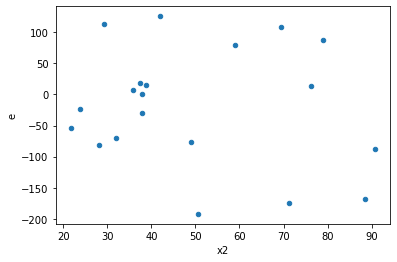

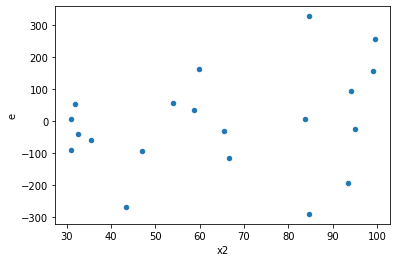

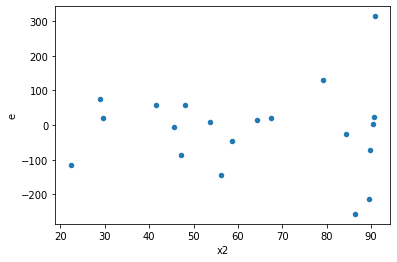

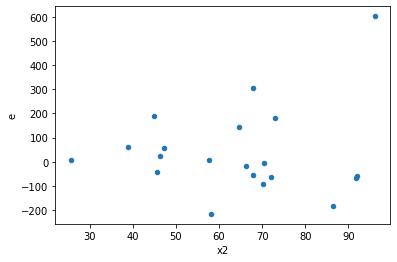

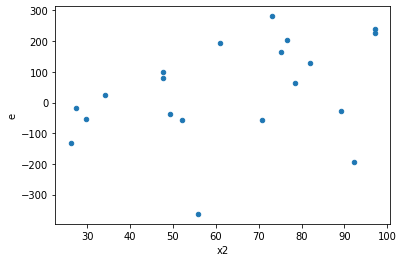

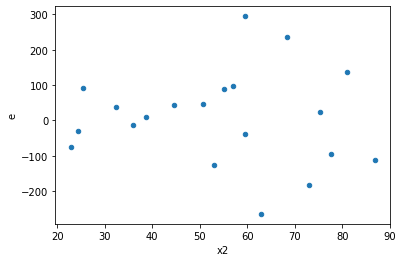

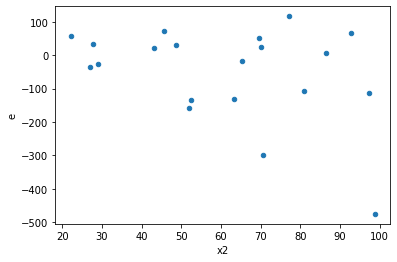

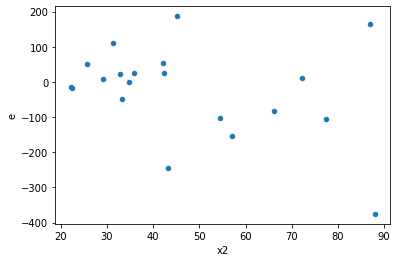

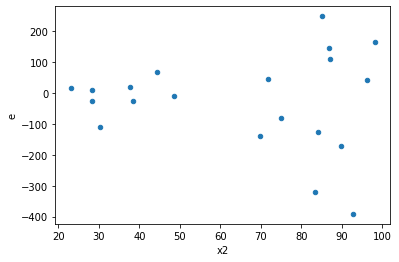

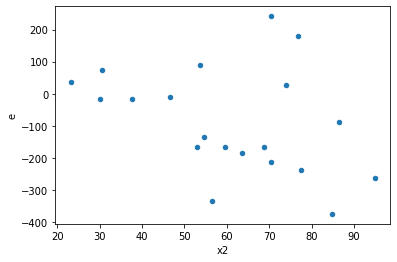

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,34200.3041158226,186854.75734117316,6840.060823164519,37370.951468234634,5.463540812630545,0.08585916343660727,0.9570704182816964,0.04292958171830363,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,52984.77513190329,165015.1255068752,10596.955026380658,33003.02510137504,3.114387578244453,0.2380564067831723,0.8809717966084138,0.11902820339158615,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,14181.385648248153,32197.184083609904,2836.2771296496308,6439.436816721981,2.270383507100187,0.38915183334365544,0.8054240833281723,0.19457591667182772,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,12958.276984553895,24633.469925792004,2591.655396910779,4926.693985158401,1.9009834374704906,0.4978023240593554,0.7510988379703223,0.2489011620296777,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,6909.792365039567,175868.51784380534,1381.9584730079134,35173.70356876107,25.452069838396408,0.0028977309269422324,0.9985511345365289,0.0014488654634711162,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,4624.237524861005,63053.86751563876,924.847504972201,12610.773503127752,13.63551659633531,0.012301302473115339,0.9938493487634423,0.006150651236557669,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,19788.17907928931,98619.40536898632,3957.6358158578623,19723.881073797264,4.983753430461082,0.10257673446204718,0.9487116327689764,0.05128836723102359,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,112085.33794380192,205630.90174417064,22417.067588760383,41126.180348834125,1.8345923339881547,0.5215389869232019,0.7392305065383991,0.26076949346160094,Reject005=1 : Homoscedasticity
9.0,5.0,5.0,32518.659297846916,134620.6856806236,6503.731859569383,26924.137136124722,4.1397981524268115,0.14506572463722778,0.9274671376813861,0.07253286231861389,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,34200.3041158226,186854.75734117316,6840.060823164519,37370.951468234634,5.463540812630545,0.08585916343660727,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,52984.77513190329,165015.1255068752,10596.955026380658,33003.02510137504,3.114387578244453,0.2380564067831723,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,14181.385648248153,32197.184083609904,2836.2771296496308,6439.436816721981,2.270383507100187,0.38915183334365544,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,21940.245580170264,3680.211654272736,4388.0491160340525,736.0423308545471,0.167737942623529,0.07226189897189969,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,12958.276984553895,24633.469925792004,2591.655396910779,4926.693985158401,1.9009834374704906,0.4978023240593554,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,6909.792365039567,175868.51784380534,1381.9584730079134,35173.70356876107,25.452069838396408,0.0028977309269422324,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,4624.237524861005,63053.86751563876,924.847504972201,12610.773503127752,13.63551659633531,0.012301302473115339,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,19788.17907928931,98619.40536898632,3957.6358158578623,19723.881073797264,4.983753430461082,0.10257673446204718,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,112085.33794380192,205630.90174417064,22417.067588760383,41126.180348834125,1.8345923339881547,0.5215389869232019,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      522
Reject005=0 : Heteroscedasticity    478
Name: Result_test, dtype: int64